# Logistic Regression

## Import Libraries

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import f1_score, confusion_matrix
import numpy as np
import en_core_web_sm

# Read Data

In [8]:
# Read data
df=pd.read_csv('../data/tagged_sentence_data.csv')
df=df.dropna()
df_spacy = df.copy(deep=True)
df['sentence'] = df['sentence'].str.split(" ")
df

,city,country,reviews,sentence,polarity,agg_polarity,sentiment
0,Vienna,Austria,Location was good Have stayed before I e 9yrs...,"[Have, stayed, before, I, e, 9yrs, ago, shop, ...",0.4767,0.476700,positive
1,Vienna,Austria,Breakfast options are limited Personally i wo...,"[Personally, i, would, choose, a, hotel, close...",0.4215,0.421500,positive
2,City of London,United Kingdom,The room was a great size for a city hotel Th...,"[The, room, was, a, great, size, for, a, city,...",0.6249,0.803000,positive
3,City of London,United Kingdom,The room was a great size for a city hotel Th...,"[The, shower, was, great, Lovely, old, buildin...",0.9811,0.803000,positive
4,West End of London,United Kingdom,The room was small and the bathroom was minut...,"[The, room, was, small, and, the, bathroom, wa...",0.0000,0.037075,negative
...,...,...,...,...,...,...,...
99995,Malakoff,France,Lovely decor ambience Super location and grea...,"[Lovely, decor, ambience, Super, location, and...",0.9153,0.915300,positive
99996,Barbican,United Kingdom,I would like to have breakfast incluyed altho...,"[I, would, like, to, have, breakfast, incluyed...",0.6486,0.648600,positive
99997,"Sant Pere, Santa Caterina i La Ribera",Spain,The location of this hotel is fantastic 2 min...,"[The, location, of, this, hotel, is, fantastic...",0.8955,0.066633,positive
99998,"Sant Pere, Santa Caterina i La Ribera",Spain,The location of this hotel is fantastic 2 min...,"[It, s, not, as, central, for, public, transpo...",0.0000,0.066633,negative


# Stemming

In [9]:
stemmer = PorterStemmer()
data_stem = df.copy(deep=True)
data_stem['sentence'] = data_stem['sentence'].apply(lambda x: [stemmer.stem(word) for word in x])

In [10]:
data_stem

,city,country,reviews,sentence,polarity,agg_polarity,sentiment
0,Vienna,Austria,Location was good Have stayed before I e 9yrs...,"[have, stay, befor, I, e, 9yr, ago, shop, no, ...",0.4767,0.476700,positive
1,Vienna,Austria,Breakfast options are limited Personally i wo...,"[person, i, would, choos, a, hotel, closer, to...",0.4215,0.421500,positive
2,City of London,United Kingdom,The room was a great size for a city hotel Th...,"[the, room, wa, a, great, size, for, a, citi, ...",0.6249,0.803000,positive
3,City of London,United Kingdom,The room was a great size for a city hotel Th...,"[the, shower, wa, great, love, old, build, wit...",0.9811,0.803000,positive
4,West End of London,United Kingdom,The room was small and the bathroom was minut...,"[the, room, wa, small, and, the, bathroom, wa,...",0.0000,0.037075,negative
...,...,...,...,...,...,...,...
99995,Malakoff,France,Lovely decor ambience Super location and grea...,"[love, decor, ambienc, super, locat, and, grea...",0.9153,0.915300,positive
99996,Barbican,United Kingdom,I would like to have breakfast incluyed altho...,"[I, would, like, to, have, breakfast, incluy, ...",0.6486,0.648600,positive
99997,"Sant Pere, Santa Caterina i La Ribera",Spain,The location of this hotel is fantastic 2 min...,"[the, locat, of, thi, hotel, is, fantast, 2, m...",0.8955,0.066633,positive
99998,"Sant Pere, Santa Caterina i La Ribera",Spain,The location of this hotel is fantastic 2 min...,"[It, s, not, as, central, for, public, transpo...",0.0000,0.066633,negative


# Lemmetisation

In [11]:
# NLTK: wordnet
lemmatizer = WordNetLemmatizer()

# spacy
# disable unnecessary features in the pipeline to quicken runtime
nlp = en_core_web_sm.load()
nlp.disable_pipes(["parser", "ner"])

# use wordnet to lemmatize by default and if word is past tense, use spacy instead
data_lemmatize = df.copy(deep=True)
data_lemmatize['sentence'] = data_lemmatize['sentence'].apply(lambda x: [lemmatizer.lemmatize(word) if "ed" not in word else nlp(word)[0].lemma_ for word in x])

In [12]:
data_lemmatize

,city,country,reviews,sentence,polarity,agg_polarity,sentiment
0,Vienna,Austria,Location was good Have stayed before I e 9yrs...,"[Have, stay, before, I, e, 9yrs, ago, shop, no...",0.4767,0.476700,positive
1,Vienna,Austria,Breakfast options are limited Personally i wo...,"[Personally, i, would, choose, a, hotel, close...",0.4215,0.421500,positive
2,City of London,United Kingdom,The room was a great size for a city hotel Th...,"[The, room, wa, a, great, size, for, a, city, ...",0.6249,0.803000,positive
3,City of London,United Kingdom,The room was a great size for a city hotel Th...,"[The, shower, wa, great, Lovely, old, building...",0.9811,0.803000,positive
4,West End of London,United Kingdom,The room was small and the bathroom was minut...,"[The, room, wa, small, and, the, bathroom, wa,...",0.0000,0.037075,negative
...,...,...,...,...,...,...,...
99995,Malakoff,France,Lovely decor ambience Super location and grea...,"[Lovely, decor, ambience, Super, location, and...",0.9153,0.915300,positive
99996,Barbican,United Kingdom,I would like to have breakfast incluyed altho...,"[I, would, like, to, have, breakfast, incluye,...",0.6486,0.648600,positive
99997,"Sant Pere, Santa Caterina i La Ribera",Spain,The location of this hotel is fantastic 2 min...,"[The, location, of, this, hotel, is, fantastic...",0.8955,0.066633,positive
99998,"Sant Pere, Santa Caterina i La Ribera",Spain,The location of this hotel is fantastic 2 min...,"[It, s, not, a, central, for, public, transpor...",0.0000,0.066633,negative


# Train Test Split

In [15]:
# Split train test
training_data, testing_data = train_test_split(data_stem, train_size = 0.8, random_state = 3000)
training_data['sentence'] = training_data['sentence'].apply(' '.join)
testing_data['sentence'] = testing_data['sentence'].apply(' '.join)
training_data

/Users/yuankanglee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/yuankanglee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,city,country,reviews,sentence,polarity,agg_polarity,sentiment
58887,Canary Wharf,United Kingdom,There was quite a long wait at the breakfast ...,there wa quit a long wait at the breakfast area,0.0000,0.254300,negative
1116,Sant Antoni,Spain,I arrived really needing wifi and both check ...,It s down instead of tri to link up with a nex...,0.5859,-0.072000,positive
76886,Barbican,United Kingdom,Air conditioning leaked and carpet was sodden...,We complain and onc we left we were pleas with...,0.3182,0.318200,positive
29965,Amsterdam,Netherlands,Controversial room pictures at booking com as...,controversi room pictur at book com as for the...,-0.2023,0.000000,negative
31434,Kensington,United Kingdom,Air conditioning was not working and room was...,they did advis they would move us to anoth roo...,0.4497,-0.185780,positive
...,...,...,...,...,...,...,...
80473,Kensington,United Kingdom,Saturday night 11pm only 2 bar tenders and th...,howev we did nt have to wait for our old frien...,0.6486,0.400850,positive
23578,Levallois-Perret,France,Room could be a little bit bigger for the 3 o...,room could be a littl bit bigger for the 3 of ...,0.0000,0.000000,negative
9208,Milan,Italy,Awsome boutique hotel with very helpful and n...,awsom boutiqu hotel with veri help and nice st...,0.8503,0.850300,positive
56883,City of London,United Kingdom,I would like to compliment Ariana from the cl...,I would like to compliment ariana from the cle...,0.7717,0.771700,positive


# TFIDF vectors

In [16]:
# Get labels
Y_train = training_data['sentiment'].values
Y_test = testing_data['sentiment'].values

# Get features, remove stopwords
tfidf_vectorizer = TfidfVectorizer(use_idf = True,stop_words = 'english', max_df = 0.95)
tfidf_vectorizer.fit_transform(training_data['sentence'].values.astype('U'))

X_train = tfidf_vectorizer.transform(training_data['sentence'].values.astype('U'))
X_test = tfidf_vectorizer.transform(testing_data['sentence'].values.astype('U'))
feature_transformer = tfidf_vectorizer

# Train Model

In [17]:
# Train logistic regression model
scikit_log_reg = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=1000)

# K-fold
scores = cross_val_score(scikit_log_reg, X_train, Y_train, cv=10, scoring='accuracy')
print(scores.mean())

model=scikit_log_reg.fit(X_train,Y_train)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]0.9005625
[LibLinear]

# Evaluate Accuracy

In [18]:
Y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.9f}'.format(model.score(X_test, Y_test)))

confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

Accuracy of logistic regression classifier on test set: 0.898450000
[[8664   19  630]
 [ 259   28  186]
 [ 927   10 9277]]


# Test New Data

In [19]:
# Test with new data
test_features=feature_transformer.transform(['the toilet is unclean service'])
test_pred = model.predict(test_features)
test_pred

array(['negative'], dtype=object)

In [ ]:
# MULTICLASS CLASSIFIER 

# Accuracy

Accuracy evaluates the fraction of correct predictions. In our case, it is the number of times the PRIMARY category appeared in the top 3 predicted categories divided by the total number of categorization tasks.

## MRR

Unlike accuracy, MRR takes the rank of the first correct answer into consideration (in our case rank of the correctly predicted PRIMARY category). The formula for MRR is as follows:

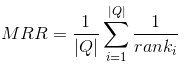

where Q here refers to all the classification tasks in our test set and rank_{i} is the position of the correctly predicted category. The higher the rank of the correctly predicted category, the higher the MRR.

In [ ]:
def get_top_k_predictions(model,X_test,k):

    # get probabilities instead of predicted labels, since we want to collect top 3
    probs = model.predict_proba(X_test)

    # GET TOP K PREDICTIONS BY PROB - note these are just index
    best_n = np.argsort(probs, axis=1)[:,-k:]

    # GET CATEGORY OF PREDICTIONS
    preds=[[model.classes_[predicted_cat] for predicted_cat in prediction] for prediction in best_n]

    # REVERSE CATEGORIES - DESCENDING ORDER OF IMPORTANCE
    preds=[ item[::-1] for item in preds]

    return preds

def collect_preds(Y_test,Y_preds):
    """Collect all predictions and ground truth"""
    
    pred_gold_list=[[[Y_test[idx]],pred] for idx,pred in enumerate(Y_preds)]
    return pred_gold_list

def compute_accuracy(eval_items:list):
    correct=0
    total=0
    
    for item in eval_items:
        true_pred=item[0]
        machine_pred=set(item[1])
        
        for cat in true_pred:
            if cat in machine_pred:
                correct+=1
                break
    
    
    accuracy=correct/float(len(eval_items))
    return accuracy

def compute_mrr_at_k(items:list):
    """Compute the MRR (average RR) at cutoff k"""
    rr_total = 0
    
    for item in items:   
        rr_at_k = _reciprocal_rank(item[0],item[1])
        rr_total = rr_total + rr_at_k
        mrr = rr_total / 1/float(len(items))

    return mrr

def _reciprocal_rank(true_labels: list, machine_preds: list):
    """Compute the reciprocal rank at cutoff k"""
    
    # add index to list only if machine predicted label exists in true labels
    tp_pos_list = [(idx + 1) for idx, r in enumerate(machine_preds) if r in true_labels]

    rr = 0
    if len(tp_pos_list) > 0:
        # for RR we need position of first correct item
        first_pos_list = tp_pos_list[0]
        
        # rr = 1/rank
        rr = 1 / float(first_pos_list)

    return rr

In [ ]:
# Evaluate accuracy
top_k = 1
preds=get_top_k_predictions(model,X_test,top_k)
    
# GET PREDICTED VALUES AND GROUND TRUTH INTO A LIST OF LISTS
eval_items=collect_preds(Y_test,preds)
    
# GET EVALUATION NUMBERS ON TEST SET -- HOW DID WE DO?
accuracy=compute_accuracy(eval_items)
mrr_at_k=compute_mrr_at_k(eval_items)

print('Accuracy={0}; MMR={1}'.format(accuracy,mrr_at_k))

# TEST WITH NEW DATA

In [ ]:
# Test with new data
test_features=feature_transformer.transform(['the toilet is clean service'])
get_top_k_predictions(model,test_features,1)